In [40]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
data = pd.read_csv("dataset/bikes.csv")

In [3]:
data.shape

(17379, 13)

In [4]:
data.head()

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2011-1-1,1,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2,2011-1-1,1,1,1,0,6,0,1,0.22,0.80,0.0,40
2,3,2011-1-1,1,1,2,0,6,0,1,0.22,0.80,0.0,32
3,4,2011-1-1,1,1,3,0,6,0,1,0.24,0.75,0.0,13
4,5,2011-1-1,1,1,4,0,6,0,1,0.24,0.75,0.0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [6]:
data.describe()

,instant,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.627229,0.190098,189.463088
std,5017.0295,1.106918,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.192930,0.122340,181.387599
min,1.0000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,40.000000
50%,8690.0000,3.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.194000,142.000000
75%,13034.5000,3.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.780000,0.253700,281.000000
max,17379.0000,4.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,977.000000


### 数据预处理

连续数据：归一化 
离散数据：

In [7]:
col_num = ["cnt", "temp", "hum", "windspeed"]
for i in col_num:
    mean, std = data[i].mean(), data[i].std()
    if i=="cnt":
        mean_cnt, std_cnt = mean,std
    data[i] = (data[i]-mean)/std

In [9]:
data.head()

,instant,dteday,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2011-1-1,1,1,0,0,6,0,1,-1.334609,0.947345,-1.553844,-0.956312
1,2,2011-1-1,1,1,1,0,6,0,1,-1.438475,0.895513,-1.553844,-0.823998
2,3,2011-1-1,1,1,2,0,6,0,1,-1.438475,0.895513,-1.553844,-0.868103
3,4,2011-1-1,1,1,3,0,6,0,1,-1.334609,0.636351,-1.553844,-0.972851
4,5,2011-1-1,1,1,4,0,6,0,1,-1.334609,0.636351,-1.553844,-1.039008


In [10]:
data[col_num].describe()

,cnt,temp,hum,windspeed
count,1.737900e+04,1.737900e+04,1.737900e+04,1.737900e+04
mean,-6.051000e-17,9.812432e-17,-2.976438e-16,1.700822e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.039008e+00,-2.477133e+00,-3.251072e+00,-1.553844e+00
25%,-8.239984e-01,-8.152801e-01,-7.631212e-01,-6.996685e-01
50%,-2.616667e-01,1.564651e-02,1.436357e-02,3.189788e-02
75%,5.046481e-01,8.465731e-01,7.918483e-01,5.198813e-01
max,4.341735e+00,2.612292e+00,1.932159e+00,5.399715e+00


In [11]:
col_class = ["season", "weathersit", "mnth", "hr", "weekday"]
for i in col_class:
    dummies = pd.get_dummies(data[i], prefix=i)
    data = pd.concat([data, dummies], axis=1)
col_to_drop=["instant", "dteday", "season", "weathersit", "weekday", "mnth", "workingday", "hr"]
data=data.drop(col_to_drop, axis=1)

In [12]:
data.head()

,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,-1.334609,0.947345,-1.553844,-0.956312,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,-1.438475,0.895513,-1.553844,-0.823998,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,-1.438475,0.895513,-1.553844,-0.868103,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,-1.334609,0.636351,-1.553844,-0.972851,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,-1.334609,0.636351,-1.553844,-1.039008,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### 切分数据集

In [14]:
test_data = data[-30*24:]
train_data = data[:-30*24]
X=train_data.drop(["cnt"], axis=1)
X=X.values
Y=train_data["cnt"]
Y=Y.values.astype(float)
Y=np.reshape(Y, [len(Y),1])

In [15]:
X.shape, Y.shape

((16659, 55), (16659, 1))

### 构建网络并训练

In [46]:
class Net(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.linear1(x)
        x = F.sigmoid(x)
        x = self.linear2(x)
        return x

In [47]:
input_size = X.shape[1]
hidden_size = 10
output_size = 1

In [48]:
net = Net(input_size, hidden_size, output_size)
print(net)

Net(
  (linear1): Linear(in_features=55, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=1, bias=True)
)


In [49]:
loss_fn = torch.nn.MSELoss()
opt = torch.optim.Adam(net.parameters())

In [51]:
epoch_num = 1000
batch_size = 128

losses=[]
for e in range(epoch_num):
    batch_loss = []
    for start in range(0, len(X), batch_size):
        if start + batch_size<len(X):
            end = start+batch_size
        else:
            end = len(X)
        x = torch.FloatTensor(X[start:end])
        y = torch.FloatTensor(Y[start:end])
        pred = net(x)
        loss = loss_fn(pred,y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        batch_loss.append(loss.data.numpy())
    if e%100==0:
        losses.append(np.mean(batch_loss))
        print(e, np.mean(batch_loss))

0 0.8642949
100 0.2292387
200 0.19351208
300 0.17358518
400 0.16548084
500 0.16142713
600 0.15911324
700 0.15741748
800 0.15595067
900 0.15475504


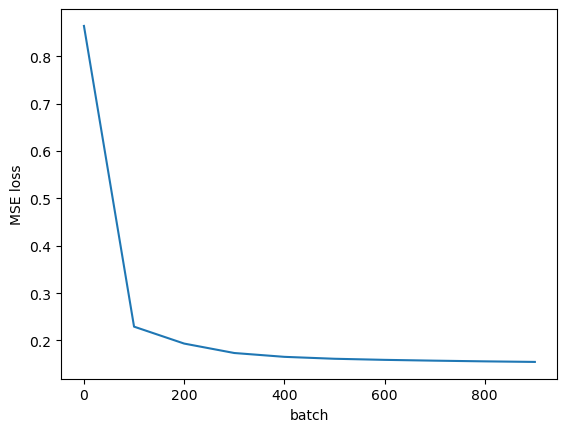

In [54]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(losses))*100, losses)
plt.xlabel("batch")
plt.ylabel("MSE loss")
plt.show()

### 测试

In [57]:
X_test = test_data.drop(["cnt"], axis=1)
Y_test = test_data["cnt"]
Y_test = Y_test.values.reshape([len(Y_test),1])

X_test = torch.FloatTensor(X_test.values)
Y_test = torch.FloatTensor(Y_test)

pred = net(X_test)

# 将归一化后的预测值再变回去
Y_test = Y_test.data.numpy()*std_cnt+mean_cnt
pred = pred.data.numpy()*std_cnt+mean_cnt

D:\Anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


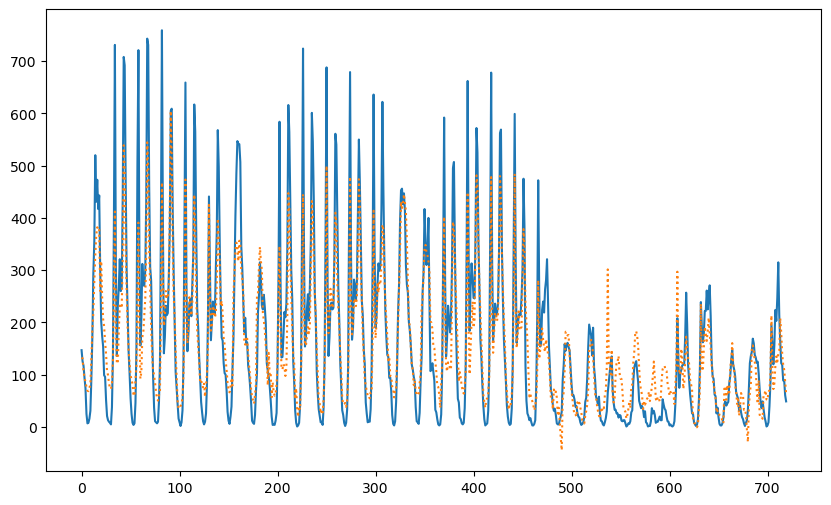

In [58]:
plt.figure(figsize=(10,6))
xplot,=plt.plot(np.arange(X_test.size(0)), Y_test)
yplot,=plt.plot(np.arange(X_test.size(0)), pred, ":")
plt.show()